In [1]:
from gpt import GPT
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(
    {"font.size": 20, "lines.linewidth": 2.5, "figure.figsize": (10, 6)}
)
from scipy.io import loadmat

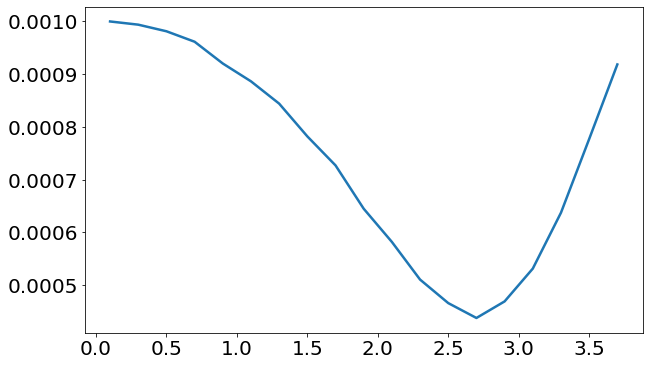

In [2]:
# Load experimental data
exp_data = loadmat(
    "/nfs/bbl/online/epics/ScriptsB24/SolenoidScan/data_03-25-2021/500um/s.mat"
)
exp_data["sx"]
exp_data["sol"]
plt.plot(exp_data["sol"], np.transpose(exp_data["sx"]))

In [3]:
G = GPT(input_file="beamline/beamline_wo_distgen.in", verbose=True)
G.set_variables({"distgen": 0.0})
G.input["variables"]

GPT.configure_gpt:
   Original input file "beamline_wo_distgen.in" in "/nfs/user/jb2483/big_gun/beamline"
   Configured to run in "/tmp/tmppeuk50py"


{'distgen': 0.0,
 'radius': 0.0007,
 'tlen': 3e-10,
 'RadiusMax': 1.0,
 'dtmax': 1e-10,
 'gun_voltage': 200.0,
 'Maxdcgun': 500.0,
 'sol01_current': 2.8,
 'ZSLA01': 0.338,
 'sol02_current': 3.0,
 'ZSLA02': 2.33,
 'SLAPolarity': 1.0,
 'space_charge': 0.0,
 'space_charge_type': 1.0,
 'Alpha': 1.0,
 'Fn': 0.5,
 'verror': 0.005,
 'Nstd': 5.0,
 'tree_code_theta': 1.0,
 'tree_code_R': 1e-06,
 'npts': 20.0,
 'tend': 1.6e-08,
 'zend': 2.736,
 'zstart': -1e-06}

GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/tmp/tmppeuk50py/beamline_wo_distgen.in"
   Running with timeout = None sec.
General Particle Tracer - Apr  3 2019
MPI usage: disabled
Number of cores: 1
Parsing: /tmp/tmppeuk50py/beamline_wo_distgen.in
gpt: /tmp/tmppeuk50py/beamline_wo_distgen.in(12): Warning: Scaling by over 2 orders of magnitide

gpt: /tmp/tmppeuk50py/beamline_wo_distgen.in(13): Warning: Scaling by over 2 orders of magnitide

Coordinate system "wcs" contains 0 local, 4 global and 1 boundary elements
Particle set "beam" contains 10000 particles
Starting time is set to -1.499822e-10
    1: t=-1.499822e-10, dt=1.000000e-16
    1: t=-1.499821e-10, dt=5.000000e-16
    1: t=-1.499816e-10, dt=2.500000e-15
    1: t=-1.499791e-10, dt=1.250000e-14
    4: t=-1.499666e-10, dt=6.250000e-14
    9: t=-1.499041e-10, dt=1.242952e-13
   17: t=-1.497798e-10, dt=2.232071e-13
   28: t=-1.495565e-10, dt=3.441253e-13
   45: t=-1.492124e-10, dt=4.865457e-13
   67: t=-1.487259e-10

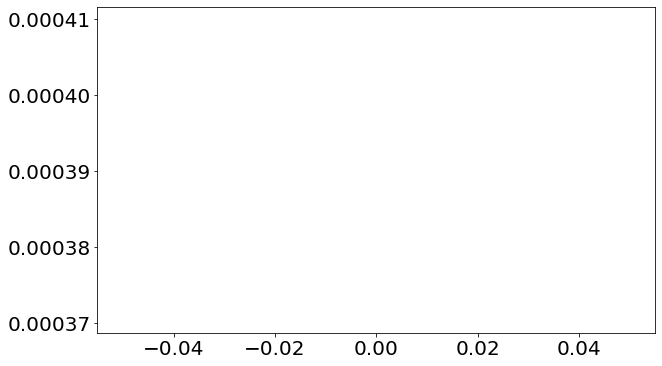

In [4]:
G.run(gpt_verbose=True)
print(G.output.keys())
print(G)
plt.plot(G.stat("sigma_x", "screen"))
# See https://github.com/ColwynGulliford/lume-gpt/blob/22112cbf22ae3ff1fa8c36d3a6572b4a743ddb3d/gpt/merit.py#L45 for available keys

In [5]:
G = GPT(input_file="beamline/beamline_wo_distgen.in", verbose=False)
G.set_variables({"distgen": 0.0})
G.input["variables"]

{'distgen': 0.0,
 'radius': 0.0007,
 'tlen': 3e-10,
 'RadiusMax': 1.0,
 'dtmax': 1e-10,
 'gun_voltage': 200.0,
 'Maxdcgun': 500.0,
 'sol01_current': 2.8,
 'ZSLA01': 0.338,
 'sol02_current': 3.0,
 'ZSLA02': 2.33,
 'SLAPolarity': 1.0,
 'space_charge': 0.0,
 'space_charge_type': 1.0,
 'Alpha': 1.0,
 'Fn': 0.5,
 'verror': 0.005,
 'Nstd': 5.0,
 'tree_code_theta': 1.0,
 'tree_code_R': 1e-06,
 'npts': 20.0,
 'tend': 1.6e-08,
 'zend': 2.736,
 'zstart': -1e-06}

In [6]:
# Solenoid 2 current vs beam size at screen 3
sol2_current = np.linspace(0, 4, num=20)
sig_x = np.array([])
for isol in sol2_current:
    print(isol)
    set_variables = G.set_variables({"sol02_current": isol, "distgen": 0})
    G.run(gpt_verbose=False)
    sig_x = np.append(sig_x, G.stat("sigma_x", "screen"))

0.0
0.21052631578947367
0.42105263157894735
0.631578947368421
0.8421052631578947
1.0526315789473684
1.263157894736842
1.4736842105263157
1.6842105263157894
1.894736842105263
2.1052631578947367
2.3157894736842106
2.526315789473684
2.7368421052631575
2.9473684210526314
3.1578947368421053
3.3684210526315788
3.578947368421052
3.789473684210526
4.0


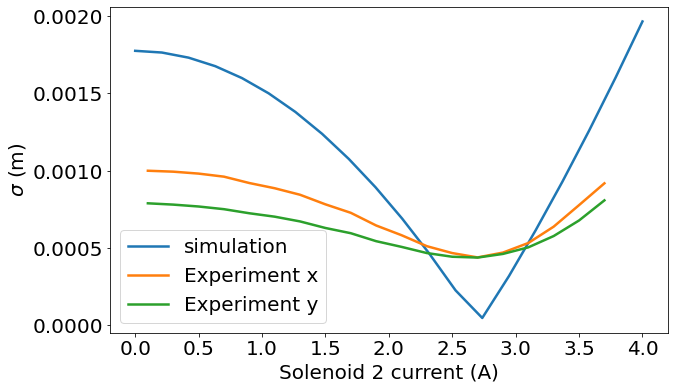

In [8]:
plt.plot(sol2_current, sig_x, label="simulation")
plt.plot(exp_data["sol"], np.transpose(exp_data["sx"]), label="Experiment x")
plt.plot(exp_data["sol"], np.transpose(exp_data["sy"]), label="Experiment y")
plt.xlabel("Solenoid 2 current (A)")
plt.ylabel(r"$\sigma$ (m)")
plt.legend()

In [12]:
sig_x

array([1.77372395e-03, 1.76266809e-03, 1.72955703e-03, 1.67446231e-03,
       1.59750260e-03, 1.49884362e-03, 1.37869803e-03, 1.23732569e-03,
       1.07503434e-03, 8.92182641e-04, 6.89189887e-04, 4.66580022e-04,
       2.25334987e-04, 4.69668139e-05, 3.17836260e-04, 6.13991903e-04,
       9.27516191e-04, 1.25745168e-03, 1.60302575e-03, 1.96347260e-03])